In [1]:
# tf 불러오기
import tensorflow as tf
from tensorflow.keras import Input, models, layers
from nltk.tokenize import word_tokenize 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
# 파이썬 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import pandas as pd
import random
import math

In [2]:
sin, cos, tan, sin_hist, cos_hist, tan_hist = 0, 0, 0, 0, 0, 0
look_back = 40

In [12]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
def make_dataset(tri):
  train, test, x_train, y_train, x_test, y_test = list(), list(), list(), list(), list(), list()
  data = eval("np." + tri + "(np.arange(5000)*(20*np.pi/1000))[:,None]")
  scaler = MinMaxScaler(feature_range=(0, 1))
  data = scaler.fit_transform(data)

  train = data[0:4500]
  test = data[4501:5000]

  x_train, y_train = create_dataset(train, look_back=40)
  x_test, y_test = create_dataset(test, look_back=40)

  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  return x_train, y_train, x_test, y_test

In [5]:
model = Sequential()
model.add(LSTM(120, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])

In [6]:
def about_loss(tri):
  eval("plt.title('" + tri + " loss')")
  eval("plt.plot(" + tri + "_hist.history['loss'])")
  eval("plt.plot(" + tri + "_hist.history['val_loss'])")
  plt.ylim(0.0, 0.005)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [7]:
def about_accuracy(tri):
  eval("plt.title('" + tri + " acc')")
  eval("plt.plot(" + tri + "_hist.history['acc'])")
  eval("plt.plot(" + tri + "_hist.history['val_acc'])")
  plt.ylim(0.0, 0.003)
  plt.ylabel('acc')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [8]:
def compare_value(tri):
  look_ahead = 140
  
  xhat = eval(tri + "[2]")[0]
  predictions = np.zeros((look_ahead,1))
  for i in range(look_ahead):
      prediction = model.predict(np.array([xhat]), batch_size=1)
      predictions[i] = prediction
      xhat = np.vstack([xhat[1:],prediction])
      
  plt.figure(figsize=(12,5))
  plt.plot(np.arange(-7, 7, 0.1),predictions,'r',label="prediction")
  plt.plot(np.arange(-7, 7, 0.1),eval(tri + "[3]")[:look_ahead],label="test function")
  eval("plt.title('" + tri + " prediction and test function')")
  plt.legend()
  plt.show()

In [9]:
def random_compare(tri):
  prediction = model.predict(eval(tri + "[2]"))

  print(tri)

  idx = random.sample([i for i in range(len(eval(tri + "[2]")))], 5)
  for i in idx:
    if prediction[i] == eval(tri + "[3]")[i]:
      print("Same case")
      print(prediction[i][0])
    else:
      print("Diff Case")
      print(prediction[i][0], eval(tri + "[3]")[i])
    print()

In [10]:
def evaluation(tri):
  about_loss(tri)
  #about_accuracy(tri) # accuracy의 경우 소수점 모든 자리가 맞을 확률이 희박하여 MSE로 진행했다.
  compare_value(tri)
  random_compare(tri)

In [16]:
sin = make_dataset('sin')
sin_hist = model.fit(sin[0], sin[1], epochs=30, batch_size=100, validation_data=(sin[2], sin[3]))
cos = make_dataset('cos')
cos_hist = model.fit(cos[0], cos[1], epochs=30, batch_size=100, validation_data=(cos[2], cos[3]))
tan = make_dataset('tan')
tan_hist = model.fit(tan[0], tan[1], epochs=30, batch_size=100, validation_data=(tan[2], tan[3]))

Epoch 1/30
45/45 [==============================] - 1s 17ms/step - loss: 0.0840 - acc: 0.0173 - val_loss: 0.0124 - val_acc: 0.0196
Epoch 2/30
45/45 [==============================] - 1s 16ms/step - loss: 0.0087 - acc: 0.0200 - val_loss: 0.0035 - val_acc: 0.0196
Epoch 3/30
45/45 [==============================] - 1s 16ms/step - loss: 0.0049 - acc: 0.0200 - val_loss: 0.0017 - val_acc: 0.0196
Epoch 4/30
45/45 [==============================] - 1s 16ms/step - loss: 0.0040 - acc: 0.0200 - val_loss: 0.0012 - val_acc: 0.0196
Epoch 5/30
45/45 [==============================] - 1s 16ms/step - loss: 0.0033 - acc: 0.0200 - val_loss: 8.7283e-04 - val_acc: 0.0196
Epoch 6/30
45/45 [==============================] - 1s 16ms/step - loss: 0.0028 - acc: 0.0200 - val_loss: 7.3833e-04 - val_acc: 0.0196
Epoch 7/30
45/45 [==============================] - 1s 16ms/step - loss: 0.0026 - acc: 0.0200 - val_loss: 6.0636e-04 - val_acc: 0.0196
Epoch 8/30
45/45 [==============================] - 1s 17ms/step - loss

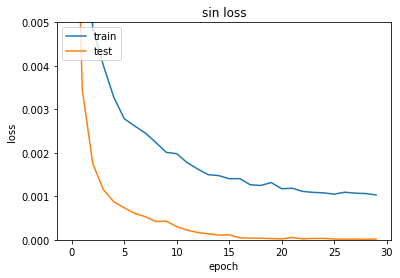

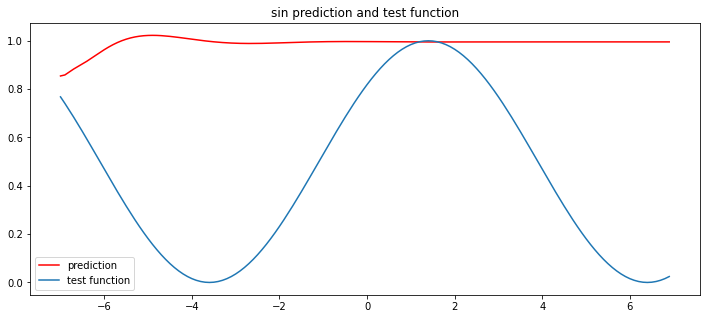

sin
Diff Case
0.52426124 0.3756550564175565

Diff Case
0.21480834 0.015708419435687904

Diff Case
0.9664793 0.9221639627510005

Diff Case
0.4419968 0.28711035421747705

Diff Case
0.47233936 0.3159377236576626



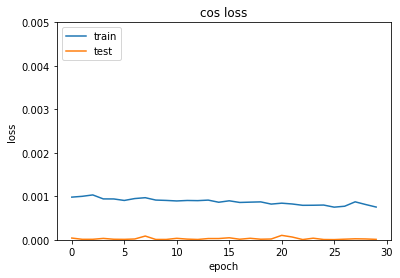

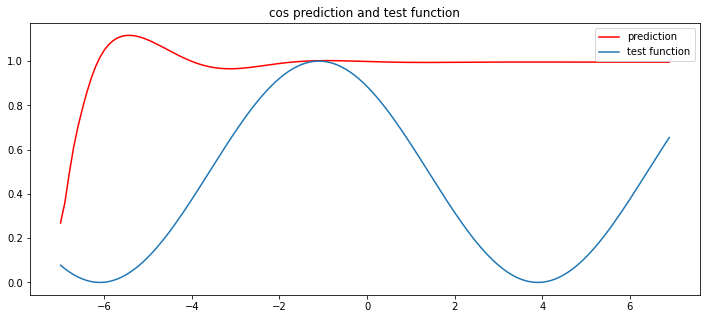

cos
Diff Case
0.932631 0.9045084971874735

Diff Case
0.7876426 0.6840622763423194

Diff Case
0.23159271 0.03511175705587366

Diff Case
0.21480834 0.015708419435687626

Diff Case
0.90187055 0.8644843137107081



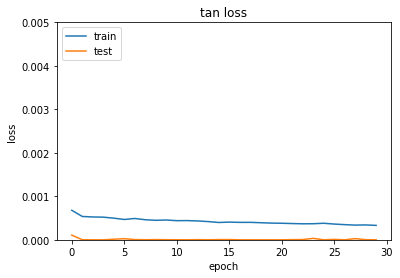

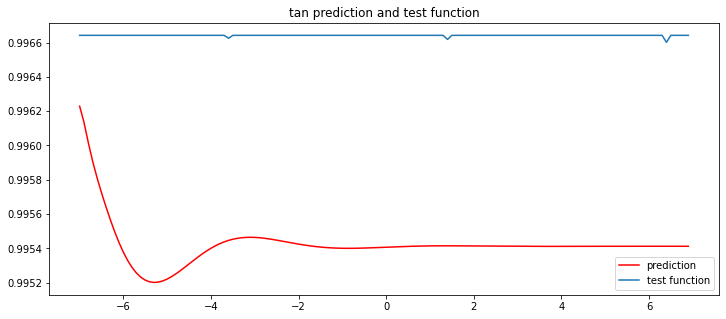

tan
Diff Case
0.99622965 0.9966417422530869

Diff Case
0.9962298 0.9966417422530869

Diff Case
0.996229 0.9966417422530869

Diff Case
0.99622685 0.9966417422530869

Diff Case
0.99622977 0.9966417422530869



In [17]:
evaluation('sin')
evaluation('cos')
evaluation('tan')